In [1]:
import torch
from torch import nn, optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

import owlready2 as owl
from owlready2 import *
owlready2.reasoning.JAVA_MEMORY = 200000

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

* Owlready2 * Warning: optimized Cython parser module 'owlready2_optimized' is not available, defaulting to slower Python implementation




In [2]:
torch.manual_seed(269)

In [3]:
from create_pytorch_dataset import GeometricInterpretation, idx_finder_dict, EMB_DIM, SCALE_FACTOR, GeometricInterpretation, EntityEmbedding
from create_pytorch_dataset import entity_to_idx_vocab, concept_to_idx_vocab, role_to_idx_vocab, idx_to_entity_vocab, idx_to_concept_vocab, idx_to_role_vocab
from create_pytorch_dataset import trainConceptDataset, testConceptDataset, trainRoleDataset, testRoleDataset, train_ConceptDataLoader, test_ConceptDataLoader, train_RoleDataLoader, test_RoleDataLoader


All Concept Names and Concept Intersections have been preprocessed for the creation of the canonical model.

All restrictions have been preprocessed for the creation of the canonical model.
Starting to reason.



* Owlready2 * Running HermiT...
    java -Xmx200000M -cp /opt/homebrew/Caskroom/miniforge/base/envs/kgenv/lib/python3.11/site-packages/owlready2/hermit:/opt/homebrew/Caskroom/miniforge/base/envs/kgenv/lib/python3.11/site-packages/owlready2/hermit/HermiT.jar org.semanticweb.HermiT.cli.CommandLine -c -O -D -I file:////var/folders/wg/g5861gcs6k5d3rbq_rncztjw0000gn/T/tmph_5qdo_r



Done reasoning. Creating the canonical model.

Concluded creating canonical model.
================EMBEDDING DIMENSION================
Concept Name dimensions: 9
The number of role names is: 5
The size of the domain is: 90
Role names dimensions: 450

Final embedding dimension: 459
The final dimension for role regions is: 918

===============FINISHED EMBEDDINGS===============
There are 90 vector embeddings.

============FINISHED INTERPS CONCEPT=============
There are 9 regions for concept names.

=============FINISHED INTERPS ROLES==============
There are 5 regions for role names.



* Owlready2 * HermiT took 0.44588708877563477 seconds
* Owlready * Reparenting entity.Q16019673: {owl.Thing} => {Class.Father}
* Owlready * Reparenting entity.Q2397531: {owl.Thing} => {Class.Father, Class.Child}
* Owlready * Reparenting entity.Q57209: {owl.Thing} => {Class.Sibling}
* Owlready * Reparenting entity.Q829669: {owl.Thing} => {Class.Child}
* Owlready * Reparenting entity.Q11090991: {owl.Thing} => {Class.Sibling}
* Owlready * Reparenting entity.Q10323203: {owl.Thing} => {Class.Sibling}
* Owlready * Reparenting entity.Q2840038: {owl.Thing} => {Class.Child}
* Owlready * Reparenting entity.Q60610: {owl.Thing} => {Class.Child}
* Owlready * Reparenting entity.Q213716: {owl.Thing} => {Class.Sibling}
* Owlready * Reparenting entity.Q312110: {owl.Thing} => {Class.Father, Class.Child, Class.Sibling, Class.Spouse}
* Owlready * Reparenting entity.Q22876077: {owl.Thing} => {Class.Child}
* Owlready * Reparenting entity.Q2446902: {owl.Thing} => {Class.Father, Class.Child}
* Owlready * Repa

In [4]:
from FaithEL_model import FaithEL
from utils import plot_loss, plot_model, save_model, train_model, plot_score_hak

In [5]:
CENTROID_SCORE = True # When set to True, model scores assertion w.r.t distance to the centroid and to the moving parameter for concepts/roles
LR = 0.01
PHI = 0 # Weighs how far the concept parameter is allowed to move
GAMMA = 1 # Weighs how far the individual parameter is allowed to move
RADIUS = SCALE_FACTOR/2 + 0.1
EMB_DIM = 459

LOG_EPOCH = 10
EVAL_TRAIN = False
EPOCHS = 500
EVAL_FREQ = 10

NEG_SAMPLING = True
PLOT_LOSS = True

DIM1 = 0
DIM2 = 1

loss_fn = nn.MSELoss()

In [6]:
torch.manual_seed(269)

model = FaithEL(EMB_DIM, PHI, RADIUS, GAMMA,
                entity_to_idx_vocab, concept_to_idx_vocab, role_to_idx_vocab,
                )

optimizer = optim.Adam(model.parameters(), lr=LR)

In [7]:
model_list = []

Epoch 10/500 -> Train Loss: -465.2139 | Test Loss: -528.2077

Epoch 10: Initiating evaluation. 

Epoch 20/500 -> Train Loss: -824.1688 | Test Loss: -915.9900

Epoch 20: Initiating evaluation. 

Epoch 30/500 -> Train Loss: -1193.7422 | Test Loss: -1306.6323

Epoch 30: Initiating evaluation. 

Epoch 40/500 -> Train Loss: -1562.0015 | Test Loss: -1703.7655

Epoch 40: Initiating evaluation. 

Epoch 50/500 -> Train Loss: -1927.9132 | Test Loss: -2095.5811

Epoch 50: Initiating evaluation. 

Epoch 60/500 -> Train Loss: -2296.3844 | Test Loss: -2488.2645

Epoch 60: Initiating evaluation. 

Epoch 70/500 -> Train Loss: -2654.1850 | Test Loss: -2875.4799

Epoch 70: Initiating evaluation. 

Epoch 80/500 -> Train Loss: -3024.8548 | Test Loss: -3285.3412

Epoch 80: Initiating evaluation. 

Epoch 90/500 -> Train Loss: -3358.0695 | Test Loss: -3676.2014

Epoch 90: Initiating evaluation. 

Epoch 100/500 -> Train Loss: -3731.0084 | Test Loss: -4010.3246

Epoch 100: Initiating evaluation. 

Epoch 110/50

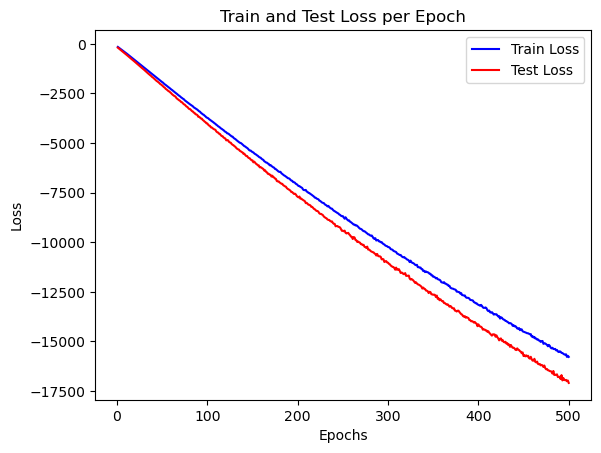

In [8]:
train_loss_list, test_loss_list, train_hits_at_k_concept, test_hits_at_k_concept, train_hits_at_k_role, test_hits_at_k_role, = train_model(model, GeometricInterpretation,
                                                                                                                                           train_ConceptDataLoader, train_RoleDataLoader, test_ConceptDataLoader, test_RoleDataLoader,
                                                                                                                                           trainConceptDataset, testConceptDataset, trainRoleDataset, testRoleDataset,
                                                                                                                                           EPOCHS, LOG_EPOCH, EVAL_FREQ, EVAL_TRAIN, loss_fn, optimizer,
                                                                                                                                           idx_to_entity_vocab, entity_to_idx_vocab,
                                                                                                                                           idx_to_concept_vocab, concept_to_idx_vocab,
                                                                                                                                           idx_to_role_vocab, role_to_idx_vocab,
                                                                                                                                           CENTROID_SCORE, NEG_SAMPLING, PLOT_LOSS
                                                                                                                                           )

model_list.append(save_model(CENTROID_SCORE, LR, PHI, GAMMA, EMB_DIM, EPOCHS, LOG_EPOCH, EVAL_FREQ, EVAL_TRAIN,
                             loss_fn, model, optimizer, train_loss_list, test_loss_list, train_hits_at_k_concept, test_hits_at_k_concept, train_hits_at_k_role, test_hits_at_k_role))

In [19]:
pos_list = -1
TOPK = 2

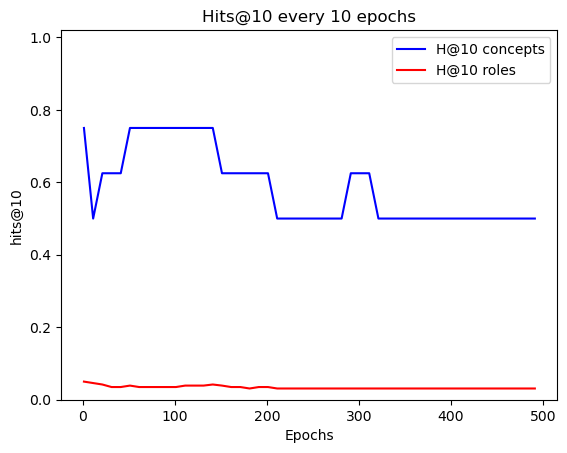

ValueError: x and y must have same first dimension, but have shapes (50,) and (0,)

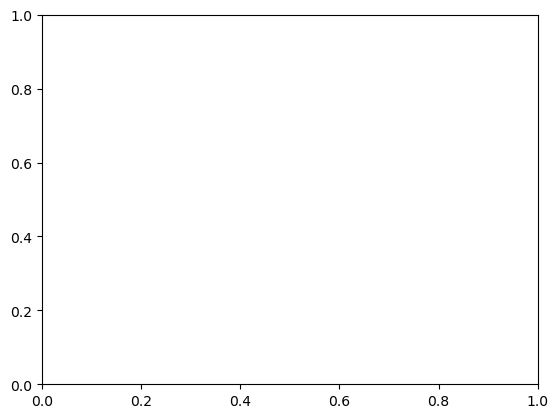

In [20]:
plot_score_hak(model_list[pos_list]['test_hits_at_k_concept'], model_list[pos_list]['test_hits_at_k_role'], TOPK, model_list[pos_list]['epochs'], model_list[pos_list]['eval_freq'])
plot_score_hak(model_list[pos_list]['train_hits_at_k_concept'], model_list[pos_list]['train_hits_at_k_role'], TOPK, model_list[pos_list]['epochs'], model_list[pos_list]['eval_freq'])